In [180]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [85]:
train_data=pd.read_csv(r'C:\Users\Vishal\Data\fakenews\train.csv')
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Pre processing

In [86]:
train_data.shape

(20800, 5)

In [87]:
#count of missing values
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [88]:
#replacing NULL with empty string
t_d=train_data.fillna('')

In [89]:
t_d.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [91]:
#merge author and title names
t_d['total']=t_d['title']+''+t_d['author']

In [92]:
print(t_d['total'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You FiredConsortiumnew...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799               What Keeps the F-35 AliveDavid Swanson
Name: total, Length: 20800, dtype: object


In [93]:
#label is the depedent feature
Y=t_d['label']
X=t_d.drop(columns='label',axis=1)

In [94]:
print(X.shape,Y.shape)

(20800, 5) (20800,)


### Stemming
To reduce words to root form

In [95]:
port=PorterStemmer()

In [101]:
def stemming(total):
  review = re.sub('[^a-zA-Z]',' ',total)
  review = review.lower()
  review = review.split()
  review = [port.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  return review

In [120]:
t_d['total']=t_d['total'].apply(stemming)
print(t_d['total'])

0        hou dem aid even see comey letter jason chaffe...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get firedconsortiumnew com
3        civilian kill singl us airstrik identifiedjess...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exerci balkansalex a...
20799                            keep f alivedavid swanson
Name: total, Length: 20800, dtype: object


In [124]:
X=t_d['total'].values
Y=t_d['label'].values
print(X.shape,Y.shape)

(20800,) (20800,)


In [122]:
print(X)

['hou dem aid even see comey letter jason chaffetz tweet itdarrel lucu'
 'flynn hillari clinton big woman campu breitbartdaniel j flynn'
 'truth might get firedconsortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york timesmichael j de la merc rachel abram'
 'nato russia hold parallel exerci balkansalex ansari'
 'keep f alivedavid swanson']


In [123]:
print(Y)

[1 0 1 ... 0 1 1]


### Performing TF-IDF

In [125]:
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)


In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=4)

### Performing logistic regression

In [127]:
#fitting the model
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

In [130]:
#accuracy of train data
X_trainpred=log_model.predict(X_train)
train_accuracy=accuracy_score(X_trainpred, Y_train)
print(train_accuracy)

0.9813186813186813


In [129]:
#accuracy of test data
X_testpred=log_model.predict(X_test)
test_accuracy=accuracy_score(X_testpred, Y_test)
print(test_accuracy)

0.9629807692307693


### Multinomial Naive Bayes implementation

In [142]:
nb = MultinomialNB()
%time nb.fit(X_train, Y_train)
y_pred_class = nb.predict(X_test)
metrics.accuracy_score(Y_test, y_pred_class)


Wall time: 11.8 ms


0.936698717948718

In [143]:
metrics.confusion_matrix(Y_test, y_pred_class)

array([[3086,   30],
       [ 365, 2759]], dtype=int64)

In [175]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33 ,random_state=45)

In [176]:
nb = MultinomialNB()
%time nb.fit(X1_train, Y1_train)
y_pred_class = nb.predict(X1_test)
metrics.accuracy_score(Y1_test, y_pred_class)


Wall time: 6.29 ms


0.9363344988344988

In [177]:
metrics.confusion_matrix(Y1_test, y_pred_class)

array([[3412,   43],
       [ 394, 3015]], dtype=int64)

accuracy: 0.9363344988344988
Confusion matrix, without normalization


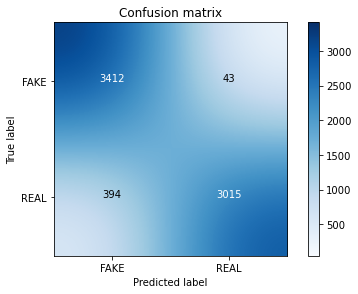

In [183]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='bicubic', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, )
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
nb.fit(X1_train, Y1_train)
prediction1 = nb.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:",score)
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['Fake', 'Real'])


### Passive aggressive classifier

In [179]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.40 ,random_state=45)

accuracy: 0.9849759615384616
Confusion matrix, without normalization


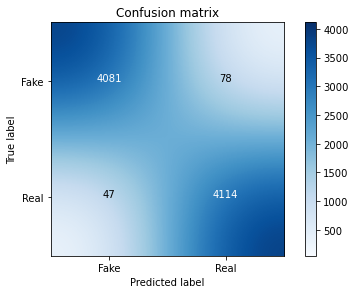

In [186]:
linear=PassiveAggressiveClassifier()
linear.fit(X2_train, Y2_train)
prediction2 = linear.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:",score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['Fake', 'Real'])

### Building a predictive model

In [198]:
#Using Logistic regression model
X_ =X_test[0]
X_pred = log_model.predict(X_)
print(X_pred)
print(Y_test[0])

if (X_pred[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')



[0]
0
The news is Real


In [201]:
#Using Multinomial Naive Bayes
X__=X1_test[12]
X__pred = log_model.predict(X__)
print(X__pred)
print(Y1_test[12])
if (X__pred[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
1
The news is Fake


In [202]:
#Using Passive Aggressive Classifier
X___=X2_test[130]
X___pred = log_model.predict(X___)
print(X___pred)
print(Y2_test[130])
if (X___pred[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
1
The news is Fake


### Classfication report

In [205]:

print(classification_report(Y_test, X_testpred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3116
           1       0.95      0.98      0.96      3124

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



In [206]:
print(classification_report(Y1_test, prediction1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3455
           1       0.99      0.88      0.93      3409

    accuracy                           0.94      6864
   macro avg       0.94      0.94      0.94      6864
weighted avg       0.94      0.94      0.94      6864



In [207]:
print(classification_report(Y2_test, prediction2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4159
           1       0.98      0.99      0.99      4161

    accuracy                           0.98      8320
   macro avg       0.99      0.98      0.98      8320
weighted avg       0.99      0.98      0.98      8320



##### Logistic Regression : Accuracy is 0.98



##### Multinomial Naive Bayes : Accuracy is 0.93



##### Passive Aggressive Classifier : Accuracy is 0.98